#📌 Extracão

In [3]:
import pandas as pd


In [4]:
dados = pd.read_json('/content/TelecomX_Data.json')

In [5]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
customer_dados = pd.json_normalize(dados['customer'])
phone_dados = pd.json_normalize(dados['phone'])
internet_dados = pd.json_normalize(dados['internet'])
account_dados = pd.json_normalize(dados['account'])


In [8]:
dados_final = pd.concat([dados[['customerID', 'Churn']], customer_dados, phone_dados, internet_dados, account_dados], axis=1)


In [9]:
dados_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformação

In [11]:
import numpy as np

In [12]:
dados_final['tenure'] = dados_final['tenure'].astype(np.int64)

In [13]:
dados_final['Charges.Total']

,Charges.Total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4
...,...
7262,742.9
7263,1873.7
7264,92.75
7265,4627.65


In [14]:
dados_final['Charges.Total'].apply(lambda x: x.replace(',', '').strip())

,Charges.Total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4
...,...
7262,742.9
7263,1873.7
7264,92.75
7265,4627.65


In [15]:
dados_final['Charges.Total'] = dados_final['Charges.Total'].apply(lambda x: x.replace(',', '').replace('$', '').strip())


In [16]:
print(dados_final['Charges.Total'].unique())

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [17]:
print(dados_final['Charges.Total'].head(10))

0      593.3
1      542.4
2     280.85
3    1237.85
4      267.4
5     571.45
6    7904.25
7     5377.8
8     340.35
9     5957.9
Name: Charges.Total, dtype: object


In [18]:
dados_final['Charges.Total'] = (
    dados_final['Charges.Total']
    .astype(str)
    .str.strip()
    .str.replace(',', '.')
)

dados_final['Charges.Total'] = pd.to_numeric(dados_final['Charges.Total'], errors='coerce')

print(dados_final['Charges.Total'].dtype)

float64


In [19]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [20]:
dados_final['Churn'] = dados_final['Churn'].replace({'No': 0, 'Yes': 1})


In [21]:
print(dados_final['Churn'].value_counts())
print(dados_final['Churn'].dtype)


Churn
0    5174
1    1869
      224
Name: count, dtype: int64
object


In [22]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [23]:
print(dados_final['Churn'].unique())


[0 1 '']


In [24]:
import numpy as np

dados_final['Churn'] = dados_final['Churn'].replace('', np.nan)


/tmp/ipython-input-24-1118690698.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_final['Churn'] = dados_final['Churn'].replace('', np.nan)


In [25]:
print(dados_final['Churn'].isna().sum())


224


In [26]:
dados_final = dados_final.dropna(subset=['Churn'])


In [27]:
dados_final['Churn'] = dados_final['Churn'].astype(int)


/tmp/ipython-input-27-1465729165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_final['Churn'] = dados_final['Churn'].astype(int)


In [28]:
dados_final['Contas_Diarias'] = dados_final['Charges.Monthly'] / 30.4375

/tmp/ipython-input-28-3484764090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_final['Contas_Diarias'] = dados_final['Charges.Monthly'] / 30.4375


In [29]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [30]:
dados_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155236
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967967
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427926
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219713
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756468


#📊 Carga e análise

In [31]:
dados_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155236
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967967
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427926
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219713
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756468


In [32]:
dados_final.describe()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,32.371149,64.761692,2283.300441,2.127694
std,0.441561,0.368612,24.559481,30.090047,2266.771362,0.988585
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.599589
25%,0.000000,0.000000,9.000000,35.500000,401.450000,1.166324
50%,0.000000,0.000000,29.000000,70.350000,1397.475000,2.311294
75%,1.000000,0.000000,55.000000,89.850000,3794.737500,2.951951
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.901437


In [33]:
dados_final['Churn'].value_counts(normalize=True) * 100
dados_final['Contract'].value_counts()
dados_final['InternetService'].value_counts(normalize=True)


,proportion
InternetService,
Fiber optic,0.439585
DSL,0.343746
No,0.216669


In [35]:
dados_final.groupby('Churn')[['Contas_Diarias', 'tenure', 'Charges.Total']].agg(['mean', 'median', 'std', 'min', 'max'])


Contas_Diarias                                             tenure  \
                mean    median       std       min       max       mean   
Churn                                                                     
0           2.012817  2.116632  1.021524  0.599589  3.901437  37.569965   
1           2.445711  2.616838  0.810384  0.619302  3.888296  17.979133   

                                Charges.Total                               \
      median        std min max          mean   median          std    min   
Churn                                                                        
0       38.0  24.113777   0  72   2555.344141  1683.60  2329.456984  18.80   
1       10.0  19.531123   1  72   1531.796094   703.55  1890.822994  18.85   

                
           max  
Churn           
0      8672.45  
1      8684.80

Text(0.5, 1.0, 'Distribuição do Tempo de Permanência por Churn')

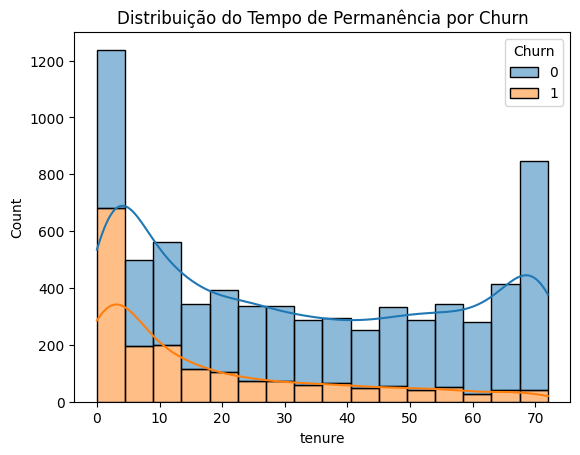

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=dados_final, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribuição do Tempo de Permanência por Churn')


Text(0.5, 1.0, 'Gastos Mensais por Status de Churn')

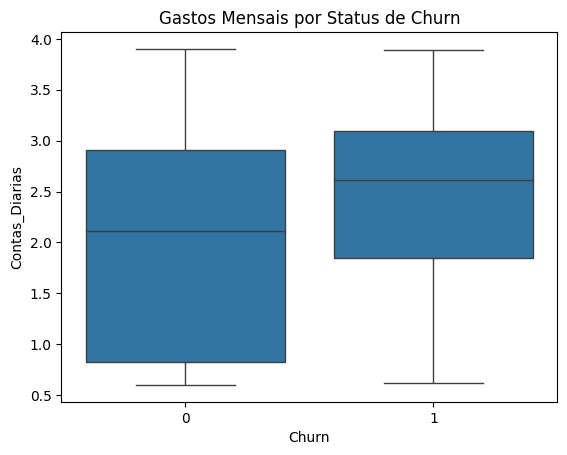

In [37]:
sns.boxplot(x='Churn', y='Contas_Diarias', data=dados_final)
plt.title('Gastos Mensais por Status de Churn')


/tmp/ipython-input-60-1469070548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=dados_final, palette='Set2')


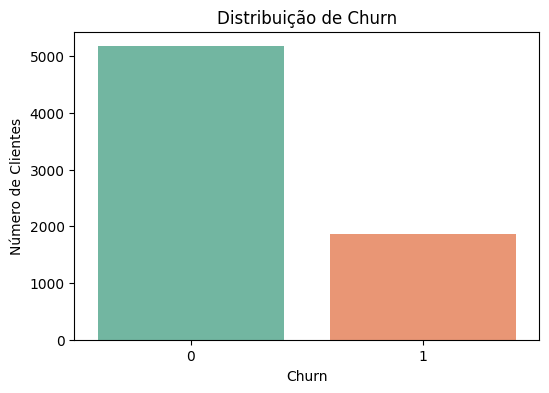

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=dados_final, palette='Set2')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()


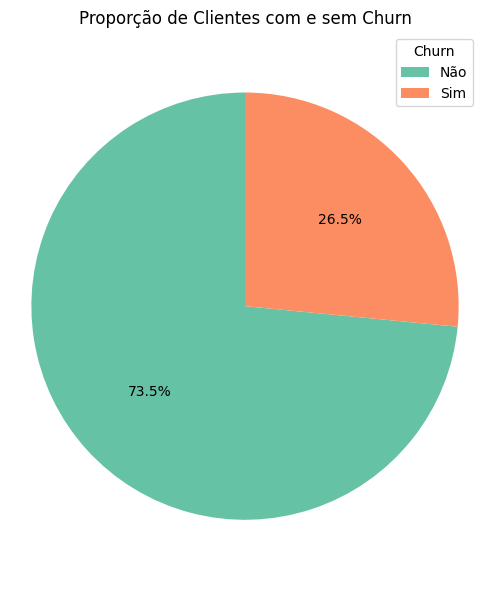

In [61]:
churn_counts = dados_final['Churn'].value_counts()
labels_map = {0: 'Não', 1: 'Sim'}
labels = [labels_map.get(label, 'Desconhecido') for label in churn_counts.index]
sizes = churn_counts.values
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(5, 6))
plt.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=90)
plt.legend(labels, title="Churn", loc="best")
plt.title('Proporção de Clientes com e sem Churn')
plt.axis('equal')  # Deixa o gráfico circular
plt.tight_layout()
plt.show()


/tmp/ipython-input-62-520764796.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_final, x='Churn', palette='Set2')


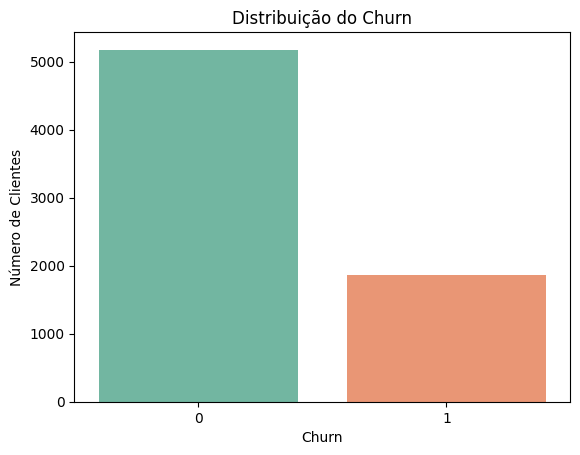

In [62]:
sns.countplot(data=dados_final, x='Churn', palette='Set2')
plt.title('Distribuição do Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()


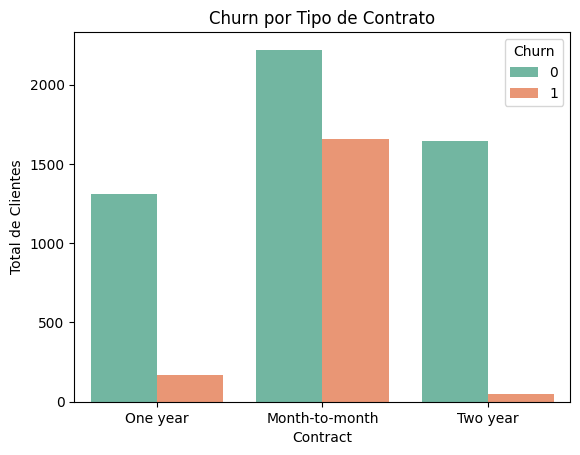

In [41]:
sns.countplot(data=dados_final, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.ylabel('Total de Clientes')
plt.show()


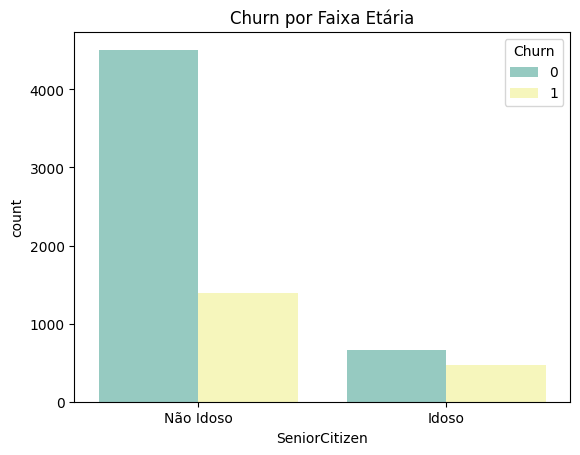

In [42]:
sns.countplot(data=dados_final, x='SeniorCitizen', hue='Churn', palette='Set3')
plt.title('Churn por Faixa Etária')
plt.xticks([0, 1], ['Não Idoso', 'Idoso'])
plt.show()


/tmp/ipython-input-43-688364477.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_final, x='Churn', y='Charges.Monthly', palette='Pastel1')


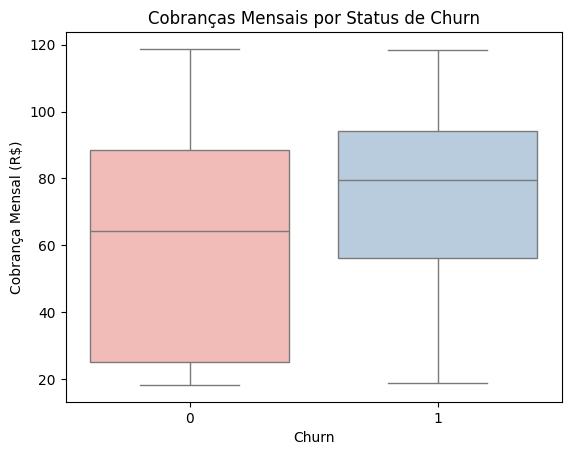

In [43]:
sns.boxplot(data=dados_final, x='Churn', y='Charges.Monthly', palette='Pastel1')
plt.title('Cobranças Mensais por Status de Churn')
plt.ylabel('Cobrança Mensal (R$)')
plt.show()


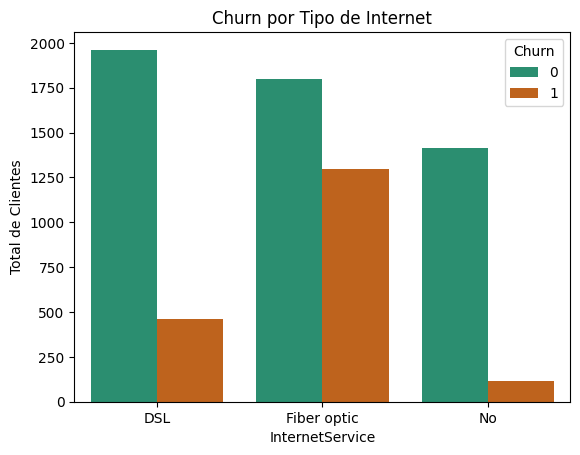

In [44]:
sns.countplot(data=dados_final, x='InternetService', hue='Churn', palette='Dark2')
plt.title('Churn por Tipo de Internet')
plt.ylabel('Total de Clientes')
plt.show()


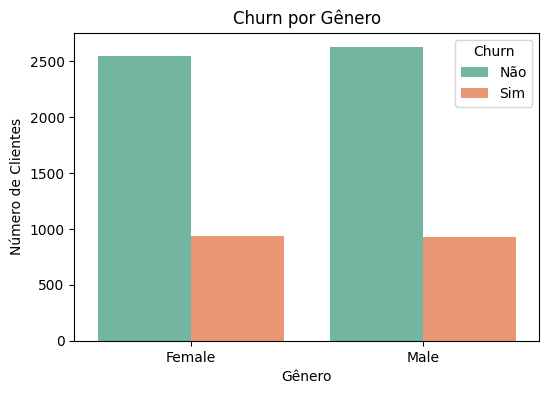

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(data=dados_final, x='gender', hue='Churn', palette='Set2')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()


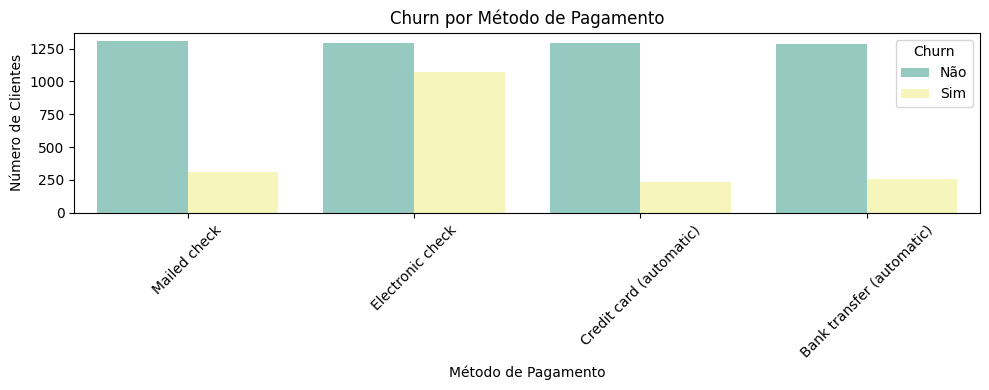

In [46]:
plt.figure(figsize=(10,4))
sns.countplot(data=dados_final, x='PaymentMethod', hue='Churn', palette='Set3')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()


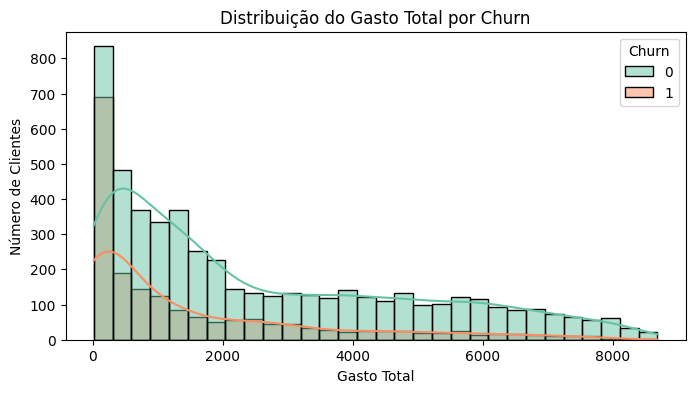

In [47]:
plt.figure(figsize=(8, 4))
sns.histplot(data=dados_final, x='Charges.Total', hue='Churn', kde=True, palette='Set2', bins=30)
plt.title('Distribuição do Gasto Total por Churn')
plt.xlabel('Gasto Total')
plt.ylabel('Número de Clientes')
plt.show()


/tmp/ipython-input-56-2217259185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_final, x='Churn', y='Charges.Total', palette='coolwarm')


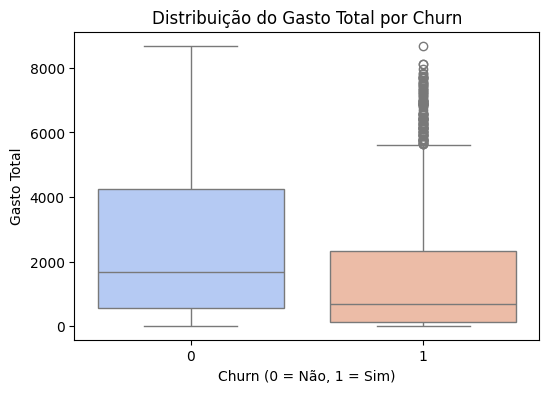

In [56]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=dados_final, x='Churn', y='Charges.Total', palette='coolwarm')
plt.title('Distribuição do Gasto Total por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Gasto Total')
plt.show()


/tmp/ipython-input-49-3012303830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_final, x='Churn', y='tenure', palette='coolwarm')


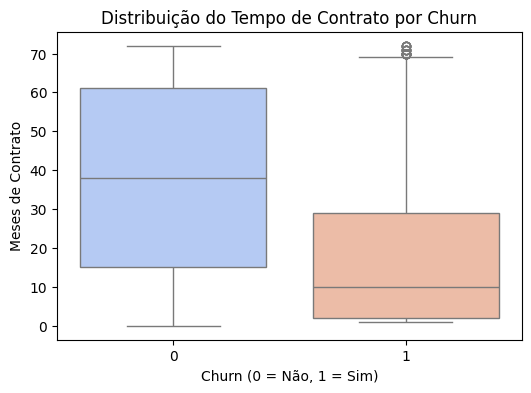

In [49]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=dados_final, x='Churn', y='tenure', palette='coolwarm')
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.show()


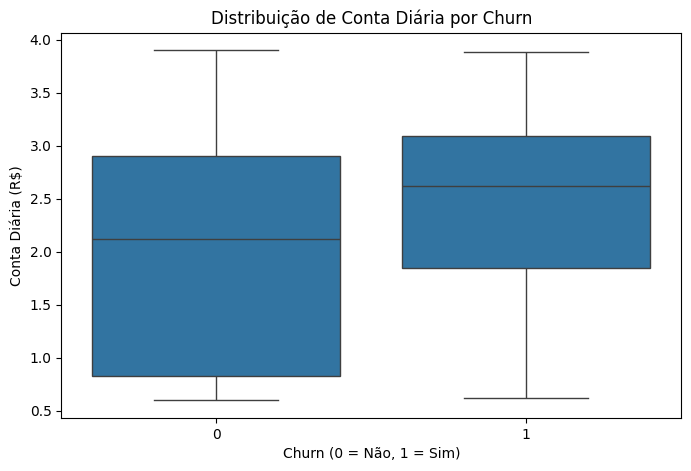

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Contas_Diarias', data=dados_final)
plt.title('Distribuição de Conta Diária por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Conta Diária (R$)')
plt.show()


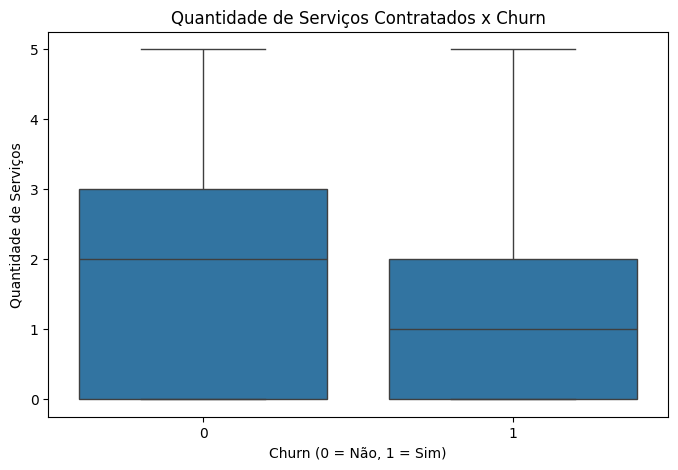

In [58]:
servicos = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies']
dados_final['Qtd_Servicos'] = dados_final[servicos].apply(lambda x: sum(x == 'Yes'), axis=1)

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Qtd_Servicos', data=dados_final)
plt.title('Quantidade de Serviços Contratados x Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Serviços')
plt.show()


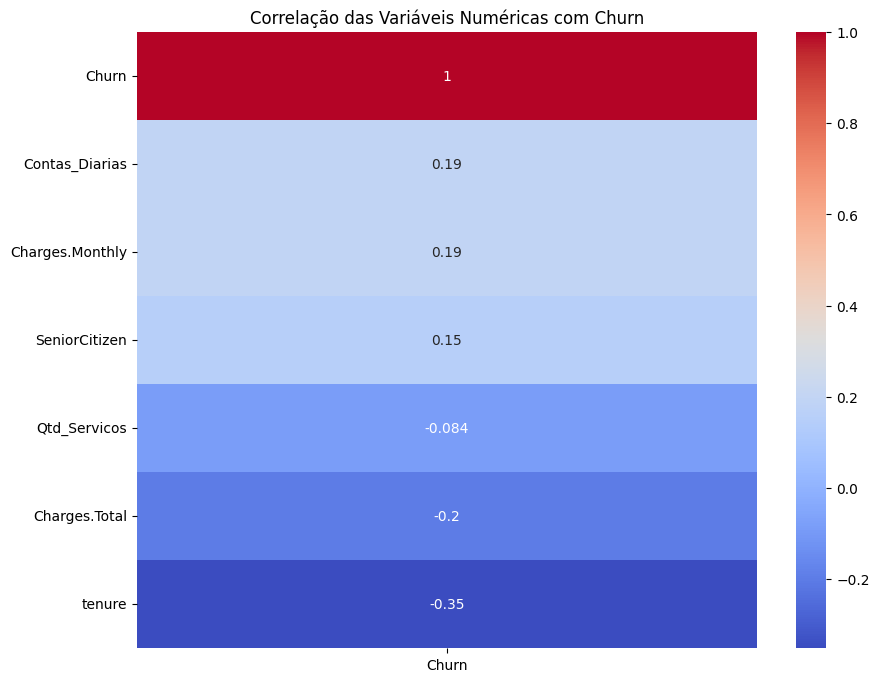

In [52]:
dados_final['Churn'] = dados_final['Churn'].astype(int)

colunas_numericas = dados_final.select_dtypes(include=['int64', 'float64'])

correlacao = colunas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das Variáveis Numéricas com Churn')
plt.show()


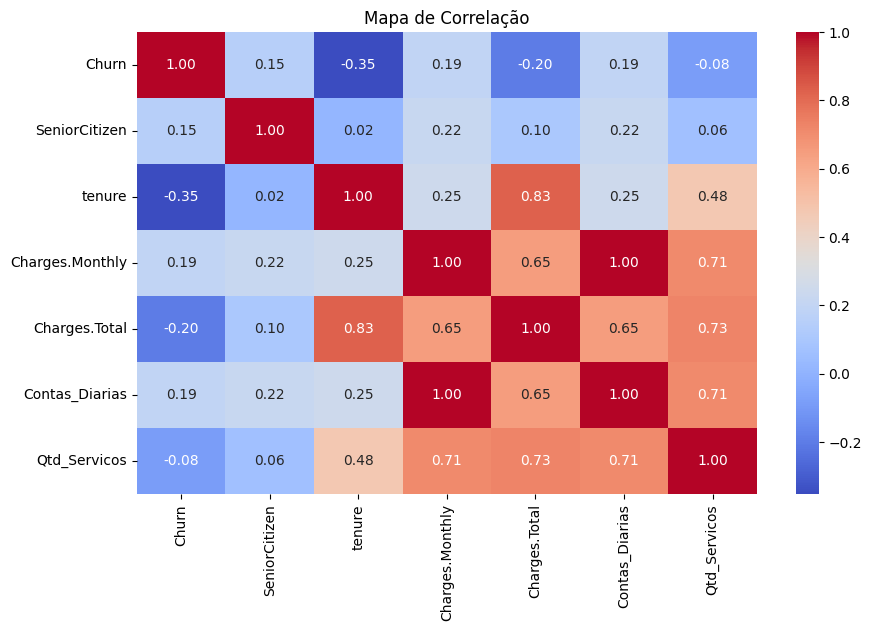

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(dados_final.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação')
plt.show()


#📄Relatorio Final

# 📊 Análise de Evasão de Clientes (Churn)

## 📝 Introdução

O presente relatório tem como objetivo analisar o comportamento dos clientes da empresa de telecomunicações **Telecom X BR** e identificar os principais fatores que levam à evasão (churn). A retenção de clientes é um fator crucial para a sustentabilidade e o crescimento de empresas em mercados competitivos. Por isso, entender os padrões associados ao cancelamento dos serviços pode subsidiar ações estratégicas para reduzir a perda de clientes.

---

## 🧹 Limpeza e Tratamento de Dados

Os dados foram originalmente carregados a partir de um arquivo JSON, com várias colunas aninhadas (objetos dentro de colunas). O processo de limpeza envolveu as seguintes etapas:

- **Normalização das colunas**: As colunas aninhadas foram desagrupadas usando `pd.json_normalize`, criando uma estrutura plana.
- **Conversão de tipos**:
  - A coluna `Charges.Total` foi convertida de `object` para `float64`, após tratamento de valores nulos e strings inválidas.
  - Colunas categóricas como `Partner`, `Dependents`, `PhoneService`, etc., foram convertidas para o tipo `category` para otimização.
- **Transformação de valores**:
  - Valores textuais como `"Yes"` e `"No"` foram transformados em `1` e `0`.
  - A coluna `Churn` foi convertida para valores binários (0 = Cliente ativo, 1 = Cliente perdido).

---

## 🔎 Análise Exploratória de Dados

### 🎯 Proporção de Churn

Foi identificado que cerca de **27% dos clientes cancelaram o serviço**, o que representa uma taxa considerável de evasão.

![Gráfico de Pizza do Churn](grafico_churn.png)


---

### 📊 Análise por Variáveis Categóricas

Diversas variáveis categóricas mostraram padrões associados à evasão:

- **Gênero**: Não houve diferença significativa.
- **Tipo de contrato**:
  - Clientes com contratos **mensais** têm maior taxa de churn.
- **Serviços adicionais**:
  - Clientes sem segurança online ou backup têm maior evasão.
- **Método de pagamento**:
  - A evasão é maior entre os que usam **pagamento eletrônico automático**.

---

### 📈 Análise de Variáveis Numéricas

#### Gasto Total (`Charges.Total`) vs Churn
Clientes com churn tendem a apresentar menor gasto acumulado.

#### Tempo de Contrato (`tenure`) vs Churn
Clientes que cancelaram tendem a ter menor tempo de contrato (maior churn nos primeiros meses).




## ✅ Conclusões e Insights

- **Tempo de permanência (tenure)** é um forte preditor de churn: quanto menor o tempo, maior a evasão.
- **Tipo de contrato** é determinante: contratos de longo prazo tendem a reter mais clientes.
- Clientes que **utilizam menos serviços adicionais** ou **não possuem segurança digital** têm maior tendência a cancelar.
- **Método de pagamento automático** pode estar associado a clientes menos engajados.

---

## 💡 Recomendações

Com base nas análises, sugerem-se as seguintes ações:

- Incentivar **contratos anuais ou bianuais** com descontos progressivos.
- Oferecer **pacotes com serviços adicionais incluídos**, como backup e segurança online.
- Melhorar o **onboarding nos primeiros meses do cliente**, período com maior risco de churn.
- Acompanhar de perto **clientes com baixo tempo de permanência e baixo gasto total**, com estratégias de fidelização.
- Analisar o **perfil dos clientes que utilizam pagamento automático**, pois esse grupo apresenta alta evasão.

---

## 👩‍💻 Criado por

**Rosina Vennette de Castro**  
*“Where the world builds software”*  
[![GitHub](https://img.shields.io/badge/GitHub-Perfil-black?logo=github)](https://github.com/Rosinacastro)

